# Python Pandas Project

In [1]:
# Given the hotel prices data for 2012-2016 in the attached CSV-

# 1. Create a visualization/chart that makes it easy to find if there are any year-over-year repeating patterns in the data?
# 2. Identify any outliers in the data visually and programmatically?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar

In [6]:
df = pd.read_csv('Multi-Year Price Data (Aggregate).csv')
df['Date'] = pd.to_datetime(df['Date'])

x = df['Date']
y = df['Price']

## Data Visualisation

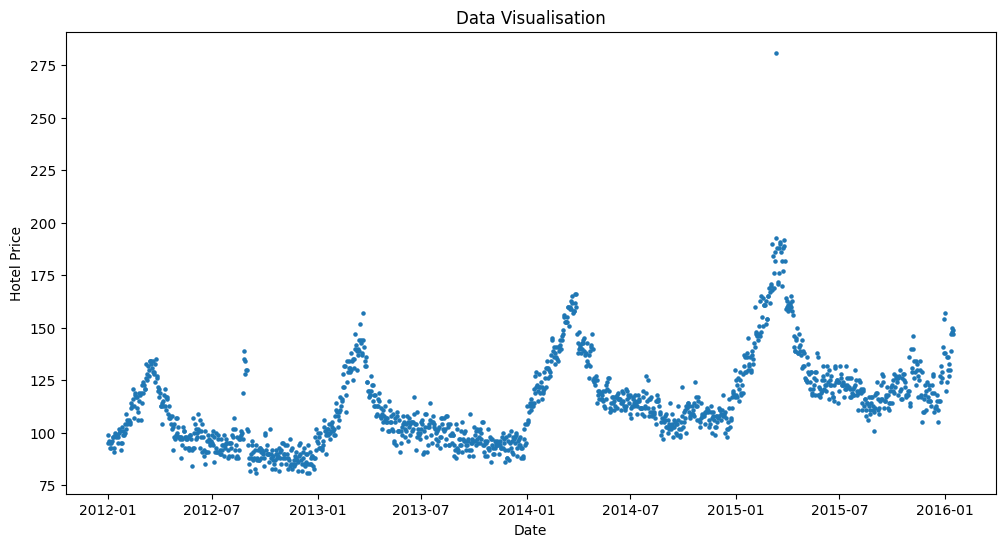

In [8]:
# Plotting a scatter plot using pyplot
plt.figure(figsize=(12,6))
plt.scatter(x, y, s=5)
plt.title('Data Visualisation')
plt.xlabel('Date')
plt.ylabel('Hotel Price')
plt.show()

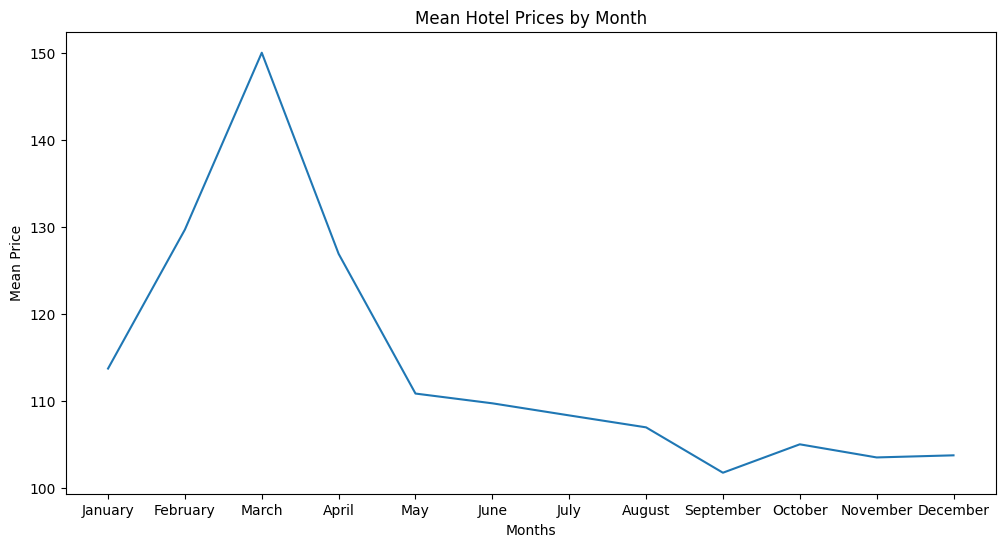

In [9]:
# To get a better understanding of the pattern,  we take the mean hotel price for each month
mean_prices = df.groupby([df['Date'].dt.month])['Price'].mean()
month_names = [calendar.month_name[i] for i in range(1, 13)]

plt.figure(figsize=(12,6))
mean_prices.plot()
plt.title('Mean Hotel Prices by Month')
plt.xlabel('Months')
plt.ylabel('Mean Price')
plt.xticks(ticks=range(1,13), labels=month_names)
plt.show()

## Outlier Detection and Visualisation

In [21]:
# Finding the moving average of the data
window_size = 30
moving_avg = np.convolve(y, np.ones(window_size)/window_size, mode='same')

deviation = np.abs(y - moving_avg)
threshold = 0.1* np.max(deviation)
print(threshold)

# Remove outliers from the data
filtered_data = np.where(deviation < threshold, y, np.nan)
outlier_data = np.where(deviation >=threshold, y, np.nan)

df = pd.DataFrame({'Date': x, 'Price': filtered_data})
df.interpolate(method='ffill')

df.dropna(inplace=True)

9.906666666666665


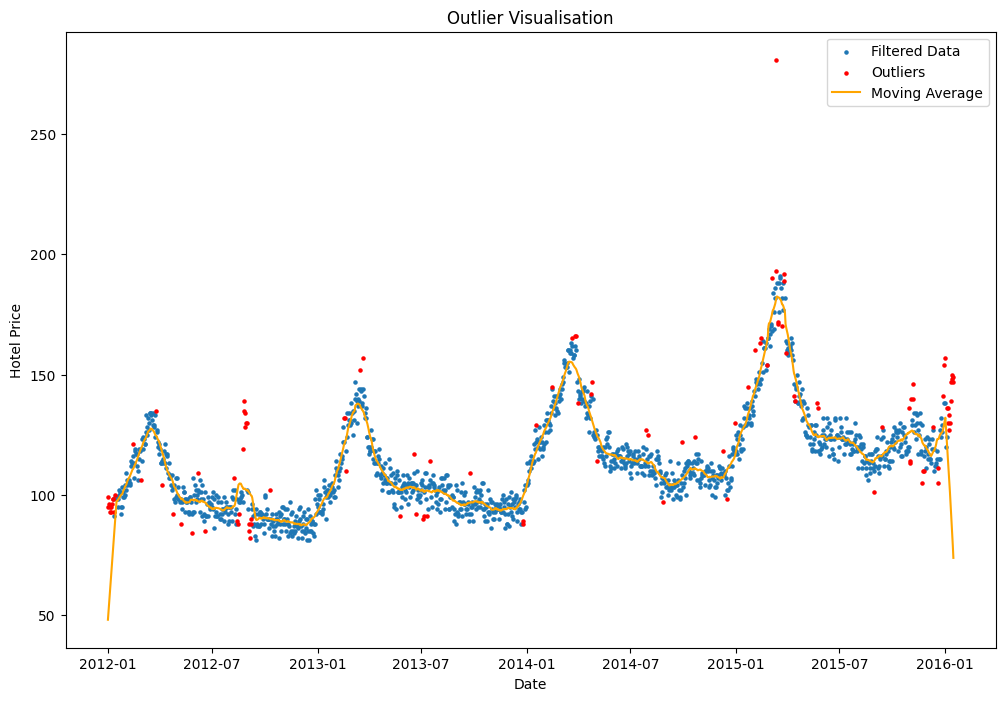

In [22]:
# Plotting the outlier points and moving average line against the data points
plt.figure(figsize=(12,8))
plt.scatter(x, filtered_data, label='Filtered Data', s =5)
plt.scatter(x, outlier_data, label = 'Outliers', s= 5, color='red')
plt.plot(x, moving_avg, label='Moving Average', color='orange')
plt.title('Outlier Visualisation')
plt.xlabel('Date')
plt.ylabel('Hotel Price')
plt.legend()
plt.show()

In [38]:
outlier_df = pd.DataFrame({'Date': x, 'Price': outlier_data})
outlier_df.dropna(inplace=True)
print("The outliers detected using moving average method are:\n",outlier_df)

The outliers detected using moving average method are:
            Date  Price
0    2012-01-01   99.0
1    2012-01-02   95.0
2    2012-01-03   96.0
3    2012-01-04   95.0
4    2012-01-05   93.0
95   2012-04-05  104.0
113  2012-04-23   92.0
146  2012-05-26   84.0
219  2012-08-08  107.0
234  2012-08-23   97.0
236  2012-08-25  139.0
237  2012-08-26  135.0
238  2012-08-27  134.0
239  2012-08-28  128.0
240  2012-08-29  130.0
241  2012-08-30  130.0
244  2012-09-02   94.0
245  2012-09-03   88.0
246  2012-09-04   85.0
247  2012-09-05   82.0
282  2012-10-10  102.0
415  2013-02-20  110.0
445  2013-03-22  157.0
533  2013-06-18  117.0
562  2013-07-17  114.0
631  2013-09-24  109.0
816  2014-03-28  166.0
844  2014-04-25  147.0
939  2014-07-29  127.0
1001 2014-09-29  122.0
1024 2014-10-22  124.0
1129 2015-02-04  160.0
1161 2015-03-08  169.0
1166 2015-03-13  281.0
1168 2015-03-15  171.0
1169 2015-03-16  172.0
1170 2015-03-17  176.0
1179 2015-03-26  189.0
1180 2015-03-27  192.0
1182 2015-03-29  159.0
1